In [1]:
import sys
sys.path.append("/home/max/Software/panter/")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime

from panter.core.corrPerkeo import CorrPerkeo
import panter.core.evalPerkeo as eP
import panter.core.dataPerkeo as dP
from panter.core.dataloaderPerkeo import DLPerkeo
from panter.config.evalFitSettings import gaus_expmod, pol1, pol0, gaus_gen, gaus_simp

%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.22/02


In [13]:
dir_to_files = "/mnt/sda/directbackup_perkeo33/dataperkeo19/scan"

eventmap_200116_3 = [
    [1, 3, list([f"{dir_to_files}/data154644--1_20_2764_3.root", f"{dir_to_files}/data154640--1_bg.root"]), 154644],
    [1, 3, list([f"{dir_to_files}/data154650--1_20_3766_3.root", f"{dir_to_files}/data154640--1_bg.root"]), 154650],
    [1, 3, list([f"{dir_to_files}/data154656--1_20_4768_3.root", f"{dir_to_files}/data154640--1_bg.root"]), 154656],
    [1, 3, list([f"{dir_to_files}/data154662--1_20_5770_3.root", f"{dir_to_files}/data154640--1_bg.root"]), 154662],
    [1, 3, list([f"{dir_to_files}/data154668--1_20_6772_3.root", f"{dir_to_files}/data154686--1_bg.root"]), 154668],
    [1, 3, list([f"{dir_to_files}/data154674--1_20_7774_3.root", f"{dir_to_files}/data154686--1_bg.root"]), 154674],
    [1, 3, list([f"{dir_to_files}/data154680--1_20_8776_3.root", f"{dir_to_files}/data154686--1_bg.root"]), 154680],
    [1, 3, list([f"{dir_to_files}/data154690--1_95_2764_3.root", f"{dir_to_files}/data154686--1_bg.root"]), 154690],
    [1, 3, list([f"{dir_to_files}/data154696--1_95_3766_3.root", f"{dir_to_files}/data154686--1_bg.root"]), 154696],
    [1, 3, list([f"{dir_to_files}/data154702--1_95_4768_3.root", f"{dir_to_files}/data154686--1_bg.root"]), 154702],
    [1, 3, list([f"{dir_to_files}/data154708--1_95_5770_3.root", f"{dir_to_files}/data154686--1_bg.root"]), 154708],
    [1, 3, list([f"{dir_to_files}/data154714--1_95_6772_3.root", f"{dir_to_files}/data154732--1_bg.root"]), 154714],
    [1, 3, list([f"{dir_to_files}/data154720--1_95_7774_3.root", f"{dir_to_files}/data154732--1_bg.root"]), 154720],
    [1, 3, list([f"{dir_to_files}/data154726--1_95_8776_3.root", f"{dir_to_files}/data154732--1_bg.root"]), 154726],
    [1, 3, list([f"{dir_to_files}/data154736--1_170_2764_3.root", f"{dir_to_files}/data154732--1_bg.root"]), 154736],
    [1, 3, list([f"{dir_to_files}/data154742--1_170_3766_3.root", f"{dir_to_files}/data154732--1_bg.root"]), 154742],
    [1, 3, list([f"{dir_to_files}/data154748--1_170_4768_3.root", f"{dir_to_files}/data154732--1_bg.root"]), 154748],
    [1, 3, list([f"{dir_to_files}/data154754--1_170_5770_3.root", f"{dir_to_files}/data154732--1_bg.root"]), 154754],
    [1, 3, list([f"{dir_to_files}/data154760--1_170_6772_3.root", f"{dir_to_files}/data154778--1_bg.root"]), 154760],
    [1, 3, list([f"{dir_to_files}/data154766--1_170_7774_3.root", f"{dir_to_files}/data154778--1_bg.root"]), 154766],
    [1, 3, list([f"{dir_to_files}/data154772--1_170_8776_3.root", f"{dir_to_files}/data154778--1_bg.root"]), 154772],
    [1, 3, list([f"{dir_to_files}/data154782--1_245_2764_3.root", f"{dir_to_files}/data154778--1_bg.root"]), 154782],
    [1, 3, list([f"{dir_to_files}/data154788--1_245_3766_3.root", f"{dir_to_files}/data154778--1_bg.root"]), 154788],
    [1, 3, list([f"{dir_to_files}/data154794--1_245_4768_3.root", f"{dir_to_files}/data154778--1_bg.root"]), 154794],
    [1, 3, list([f"{dir_to_files}/data154800--1_245_5770_3.root", f"{dir_to_files}/data154778--1_bg.root"]), 154800],
    [1, 3, list([f"{dir_to_files}/data154806--1_245_6772_3.root", f"{dir_to_files}/data154824--1_bg.root"]), 154806],
    [1, 3, list([f"{dir_to_files}/data154812--1_245_7774_3.root", f"{dir_to_files}/data154824--1_bg.root"]), 154812],
    [1, 3, list([f"{dir_to_files}/data154818--1_245_8776_3.root", f"{dir_to_files}/data154824--1_bg.root"]), 154818],
    [1, 3, list([f"{dir_to_files}/data154828--1_320_2764_3.root", f"{dir_to_files}/data154824--1_bg.root"]), 154828],
    [1, 3, list([f"{dir_to_files}/data154834--1_320_3766_3.root", f"{dir_to_files}/data154824--1_bg.root"]), 154834],
    [1, 3, list([f"{dir_to_files}/data154840--1_320_4768_3.root", f"{dir_to_files}/data154824--1_bg.root"]), 154840],
    [1, 3, list([f"{dir_to_files}/data154846--1_320_5770_3.root", f"{dir_to_files}/data154824--1_bg.root"]), 154846],
    [1, 3, list([f"{dir_to_files}/data154852--1_320_6772_3.root", f"{dir_to_files}/data154870--1_bg.root"]), 154852],
    [1, 3, list([f"{dir_to_files}/data154858--1_320_7774_3.root", f"{dir_to_files}/data154870--1_bg.root"]), 154858],
    [1, 3, list([f"{dir_to_files}/data154864--1_320_8776_3.root", f"{dir_to_files}/data154870--1_bg.root"]), 154864],
]
eventmap_200116_2 = [
    [1, 2, list([f"{dir_to_files}/data154878--1_20_2764_2.root", f"{dir_to_files}/data154874--1_bg.root"]), 154878],
    [1, 2, list([f"{dir_to_files}/data154884--1_20_3766_2.root", f"{dir_to_files}/data154874--1_bg.root"]), 154884],
    [1, 2, list([f"{dir_to_files}/data154890--1_20_4768_2.root", f"{dir_to_files}/data154874--1_bg.root"]), 154890],
    [1, 2, list([f"{dir_to_files}/data154896--1_20_5770_2.root", f"{dir_to_files}/data154874--1_bg.root"]), 154896],
    [1, 2, list([f"{dir_to_files}/data154902--1_20_6772_2.root", f"{dir_to_files}/data154920--1_bg.root"]), 154902],
    [1, 2, list([f"{dir_to_files}/data154908--1_20_7774_2.root", f"{dir_to_files}/data154920--1_bg.root"]), 154908],
    [1, 2, list([f"{dir_to_files}/data154914--1_20_8776_2.root", f"{dir_to_files}/data154920--1_bg.root"]), 154914],
    [1, 2, list([f"{dir_to_files}/data154924--1_95_2764_2.root", f"{dir_to_files}/data154920--1_bg.root"]), 154924],
    [1, 2, list([f"{dir_to_files}/data154930--1_95_3766_2.root", f"{dir_to_files}/data154920--1_bg.root"]), 154930],
    [1, 2, list([f"{dir_to_files}/data154936--1_95_4768_2.root", f"{dir_to_files}/data154920--1_bg.root"]), 154936],
    [1, 2, list([f"{dir_to_files}/data154942--1_95_5770_2.root", f"{dir_to_files}/data154920--1_bg.root"]), 154942],
    [1, 2, list([f"{dir_to_files}/data154948--1_95_6772_2.root", f"{dir_to_files}/data154966--1_bg.root"]), 154948],
    [1, 2, list([f"{dir_to_files}/data154954--1_95_7774_2.root", f"{dir_to_files}/data154966--1_bg.root"]), 154954],
    [1, 2, list([f"{dir_to_files}/data154960--1_95_8776_2.root", f"{dir_to_files}/data154966--1_bg.root"]), 154960],
    [1, 2, list([f"{dir_to_files}/data154970--1_170_2764_2.root", f"{dir_to_files}/data154966--1_bg.root"]), 154970],
    [1, 2, list([f"{dir_to_files}/data154976--1_170_3766_2.root", f"{dir_to_files}/data154966--1_bg.root"]), 154976],
    [1, 2, list([f"{dir_to_files}/data154982--1_170_4768_2.root", f"{dir_to_files}/data154966--1_bg.root"]), 154982],
    [1, 2, list([f"{dir_to_files}/data154988--1_170_5770_2.root", f"{dir_to_files}/data154966--1_bg.root"]), 154988],
    [1, 2, list([f"{dir_to_files}/data154994--1_170_6772_2.root", f"{dir_to_files}/data155012--1_bg.root"]), 154994],
    [1, 2, list([f"{dir_to_files}/data155000--1_170_7774_2.root", f"{dir_to_files}/data155012--1_bg.root"]), 154000],
    [1, 2, list([f"{dir_to_files}/data155006--1_170_8776_2.root", f"{dir_to_files}/data155012--1_bg.root"]), 155006],
    [1, 2, list([f"{dir_to_files}/data155016--1_245_2764_2.root", f"{dir_to_files}/data155012--1_bg.root"]), 155016],
    [1, 2, list([f"{dir_to_files}/data155022--1_245_3766_2.root", f"{dir_to_files}/data155012--1_bg.root"]), 155022],
    [1, 2, list([f"{dir_to_files}/data155028--1_245_4768_2.root", f"{dir_to_files}/data155012--1_bg.root"]), 155028],
    [1, 2, list([f"{dir_to_files}/data155034--1_245_5770_2.root", f"{dir_to_files}/data155012--1_bg.root"]), 155034],
    [1, 2, list([f"{dir_to_files}/data155040--1_245_6772_2.root", f"{dir_to_files}/data155058--1_bg.root"]), 155040],
    [1, 2, list([f"{dir_to_files}/data155046--1_245_7774_2.root", f"{dir_to_files}/data155058--1_bg.root"]), 155046],
    [1, 2, list([f"{dir_to_files}/data155052--1_245_8776_2.root", f"{dir_to_files}/data155058--1_bg.root"]), 155052],
    [1, 2, list([f"{dir_to_files}/data155062--1_320_2764_2.root", f"{dir_to_files}/data155058--1_bg.root"]), 155062],
    [1, 2, list([f"{dir_to_files}/data155068--1_320_3766_2.root", f"{dir_to_files}/data155058--1_bg.root"]), 155068],
    [1, 2, list([f"{dir_to_files}/data155074--1_320_4768_2.root", f"{dir_to_files}/data155058--1_bg.root"]), 155074],
    [1, 2, list([f"{dir_to_files}/data155080--1_320_5770_2.root", f"{dir_to_files}/data155058--1_bg.root"]), 155080],
    [1, 2, list([f"{dir_to_files}/data155086--1_320_6772_2.root", f"{dir_to_files}/data155104--1_bg.root"]), 155086],
    [1, 2, list([f"{dir_to_files}/data155092--1_320_7774_2.root", f"{dir_to_files}/data155104--1_bg.root"]), 155092],
    [1, 2, list([f"{dir_to_files}/data155098--1_320_8776_2.root", f"{dir_to_files}/data155104--1_bg.root"]), 155098],
]
eventmap_200116_0 = [
    [1, 0, list([f"{dir_to_files}/data155112--1_20_2764_0.root", f"{dir_to_files}/data155108--1_bg.root"]), 155112],
    [1, 0, list([f"{dir_to_files}/data155118--1_20_3766_0.root", f"{dir_to_files}/data155108--1_bg.root"]), 155118],
    [1, 0, list([f"{dir_to_files}/data155124--1_20_4768_0.root", f"{dir_to_files}/data155108--1_bg.root"]), 155124],
    [1, 0, list([f"{dir_to_files}/data155130--1_20_5770_0.root", f"{dir_to_files}/data155108--1_bg.root"]), 155130],
    [1, 0, list([f"{dir_to_files}/data155136--1_20_6772_0.root", f"{dir_to_files}/data155154--1_bg.root"]), 155136],
    [1, 0, list([f"{dir_to_files}/data155142--1_20_7774_0.root", f"{dir_to_files}/data155154--1_bg.root"]), 155142],
    [1, 0, list([f"{dir_to_files}/data155148--1_20_8776_0.root", f"{dir_to_files}/data155154--1_bg.root"]), 155148],
    [1, 0, list([f"{dir_to_files}/data155158--1_95_2764_0.root", f"{dir_to_files}/data155154--1_bg.root"]), 155158],
    [1, 0, list([f"{dir_to_files}/data155164--1_95_3766_0.root", f"{dir_to_files}/data155154--1_bg.root"]), 155164],
    [1, 0, list([f"{dir_to_files}/data155170--1_95_4768_0.root", f"{dir_to_files}/data155154--1_bg.root"]), 155170],
    [1, 0, list([f"{dir_to_files}/data155176--1_95_5770_0.root", f"{dir_to_files}/data155154--1_bg.root"]), 155176],
    [1, 0, list([f"{dir_to_files}/data155182--1_95_6772_0.root", f"{dir_to_files}/data155200--1_bg.root"]), 155182],
    [1, 0, list([f"{dir_to_files}/data155188--1_95_7774_0.root", f"{dir_to_files}/data155200--1_bg.root"]), 155188],
    [1, 0, list([f"{dir_to_files}/data155194--1_95_8776_0.root", f"{dir_to_files}/data155200--1_bg.root"]), 155194],
    [1, 0, list([f"{dir_to_files}/data155204--1_170_2764_0.root", f"{dir_to_files}/data155200--1_bg.root"]), 155204],
    [1, 0, list([f"{dir_to_files}/data155210--1_170_3766_0.root", f"{dir_to_files}/data155200--1_bg.root"]), 155210],
    [1, 0, list([f"{dir_to_files}/data155216--1_170_4768_0.root", f"{dir_to_files}/data155200--1_bg.root"]), 155216],
    [1, 0, list([f"{dir_to_files}/data155222--1_170_5770_0.root", f"{dir_to_files}/data155200--1_bg.root"]), 155222],
    [1, 0, list([f"{dir_to_files}/data155228--1_170_6772_0.root", f"{dir_to_files}/data155246--1_bg.root"]), 155228],
    [1, 0, list([f"{dir_to_files}/data155234--1_170_7774_0.root", f"{dir_to_files}/data155246--1_bg.root"]), 155234],
    [1, 0, list([f"{dir_to_files}/data155240--1_170_8776_0.root", f"{dir_to_files}/data155246--1_bg.root"]), 155240],
    [1, 0, list([f"{dir_to_files}/data155250--1_245_2764_0.root", f"{dir_to_files}/data155246--1_bg.root"]), 155250],
    [1, 0, list([f"{dir_to_files}/data155256--1_245_3766_0.root", f"{dir_to_files}/data155246--1_bg.root"]), 155256],
    [1, 0, list([f"{dir_to_files}/data155262--1_245_4768_0.root", f"{dir_to_files}/data155246--1_bg.root"]), 155262],
    [1, 0, list([f"{dir_to_files}/data155268--1_245_5770_0.root", f"{dir_to_files}/data155246--1_bg.root"]), 155268],
    [1, 0, list([f"{dir_to_files}/data155274--1_245_6772_0.root", f"{dir_to_files}/data155292--1_bg.root"]), 155274],
    [1, 0, list([f"{dir_to_files}/data155280--1_245_7774_0.root", f"{dir_to_files}/data155292--1_bg.root"]), 155280],
    [1, 0, list([f"{dir_to_files}/data155286--1_245_8776_0.root", f"{dir_to_files}/data155292--1_bg.root"]), 155286],
    [1, 0, list([f"{dir_to_files}/data155296--1_320_2764_0.root", f"{dir_to_files}/data155292--1_bg.root"]), 155296],
    [1, 0, list([f"{dir_to_files}/data155302--1_320_3766_0.root", f"{dir_to_files}/data155292--1_bg.root"]), 155302],
    [1, 0, list([f"{dir_to_files}/data155308--1_320_4768_0.root", f"{dir_to_files}/data155292--1_bg.root"]), 155308],
    [1, 0, list([f"{dir_to_files}/data155314--1_320_5770_0.root", f"{dir_to_files}/data155292--1_bg.root"]), 155314],
    [1, 0, list([f"{dir_to_files}/data155320--1_320_6772_0.root", f"{dir_to_files}/data155338--1_bg.root"]), 155320],
    [1, 0, list([f"{dir_to_files}/data155326--1_320_7774_0.root", f"{dir_to_files}/data155338--1_bg.root"]), 155326],
    [1, 0, list([f"{dir_to_files}/data155332--1_320_8776_0.root", f"{dir_to_files}/data155338--1_bg.root"]), 155332],
]
test = [
    [1, 3, list([f"{dir_to_files}/data135502--1_245_7774_3.root", f"{dir_to_files}/../cycle201/data135330-68200_bg.root"]), 135502],
]
test2 = [
    [1, 3, list([f"{dir_to_files}/data135502--1_245_7774_3.root", f"{dir_to_files}/../cycle201/data135330-68200_bg.root"]), 135502],
    [1, 3, list([f"{dir_to_files}/data135502--1_245_7774_3.root", f"/mnt/sda/directbackup_perkeo33/dataperkeo19/Det200113/data135556.root"]), 135502],
]
# data135330-68200_bg.root
# data135580-68206_bg.root

In [25]:
from matplotlib import pyplot
# pyplot.style.use('dark_background')
pyplot.style.use('grayscale')

## DetSum for each detector separately WITHOUT corrections

PMT0


/home/max/Software/panter/panter/core/dataPerkeo.py:127: RuntimeWarning: invalid value encountered in sqrt
  self.stdv = np.sqrt(var)


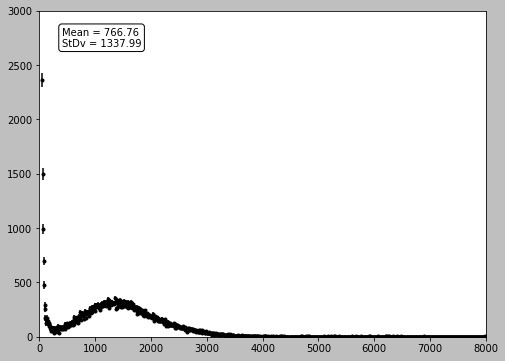

PMT1


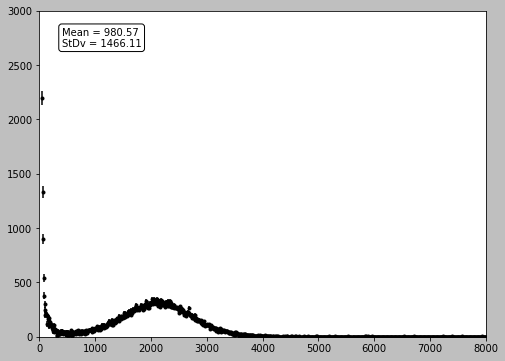

PMT2


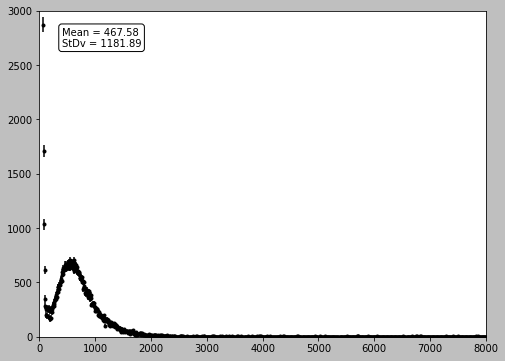

PMT3


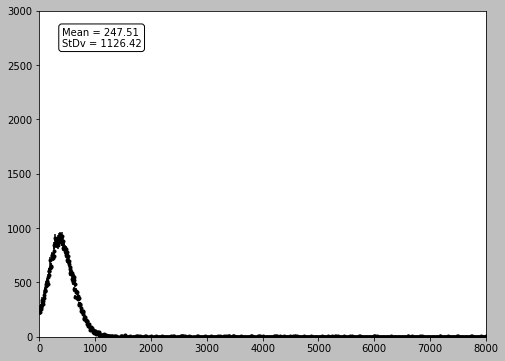

PMT4


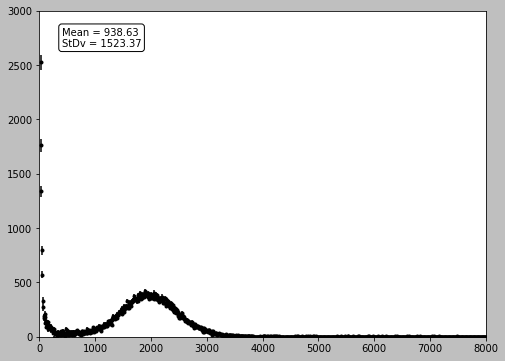

PMT5


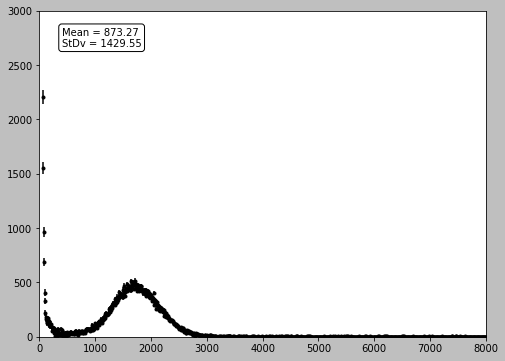

PMT6


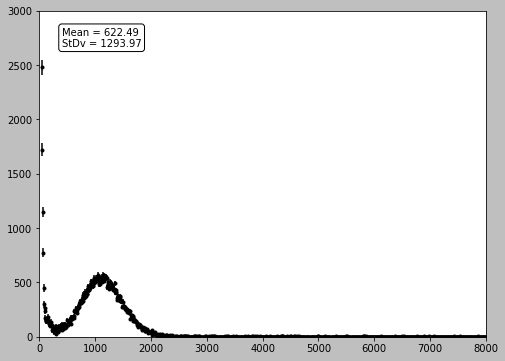

PMT7


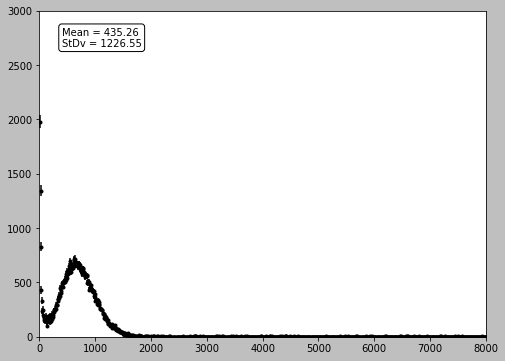

PMT8


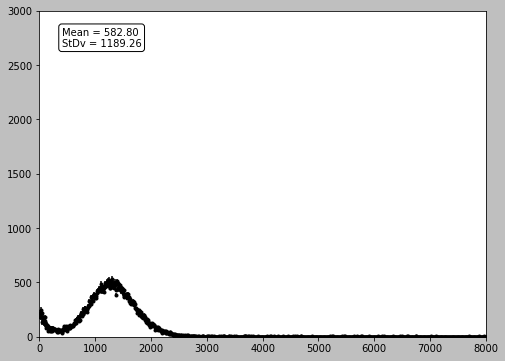

PMT9


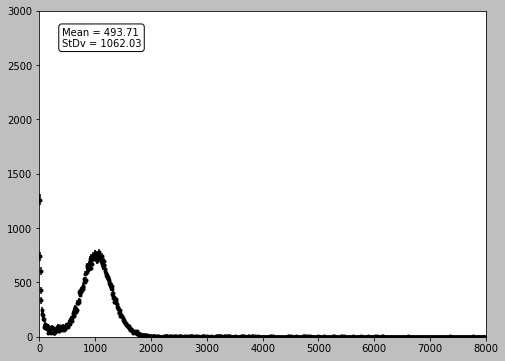

PMT10


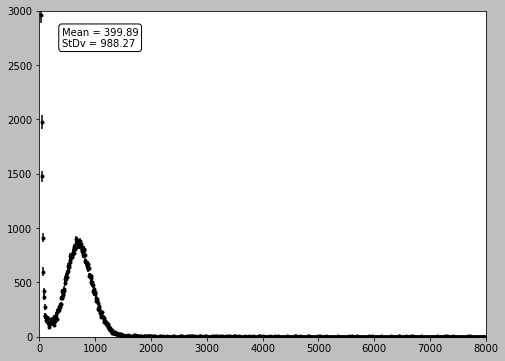

PMT11


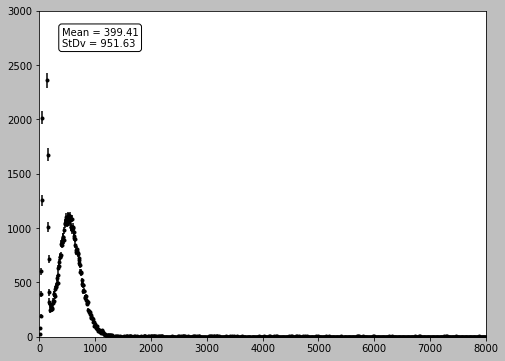

PMT12


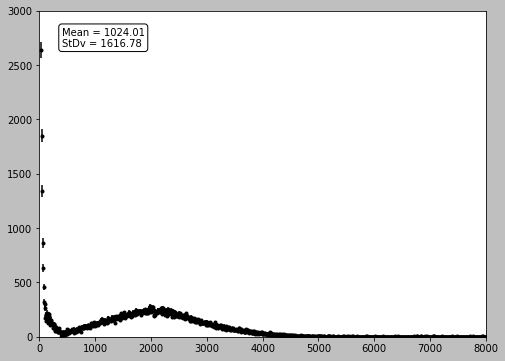

PMT13


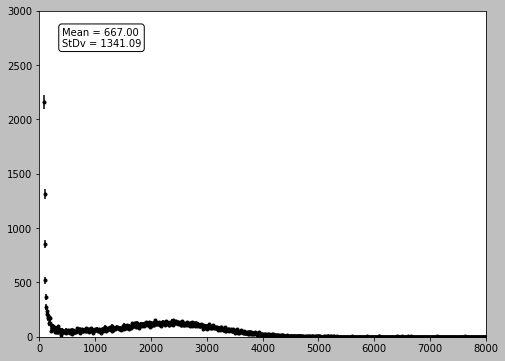

PMT14


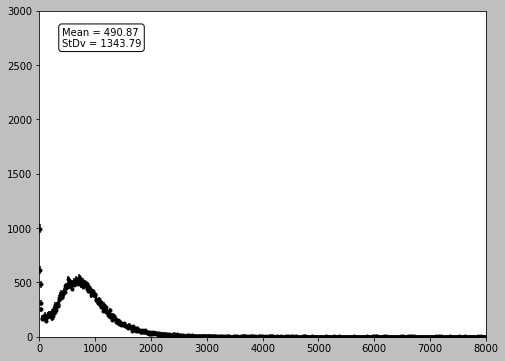

PMT15


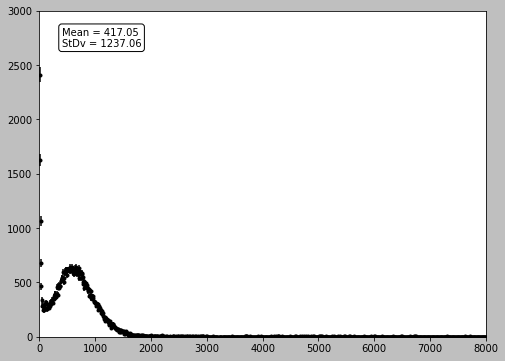

In [31]:
dataloader = DLPerkeo(dir_to_files)
dataloader.fill(test)

meas = dataloader.ret_meas()
corr_class = CorrPerkeo(meas, mode=2)
corr_class.set_all_corr(bactive=False)
corr_class.corrections["Drift"] = False
corr_class.corr(bstore=True, bwrite=False)

for ind, hist in corr_class.histograms:
    for det in range(len(hist)):
        print(f"PMT{det}")
        hist[det].plot_hist([0., 8e3, 0., 3e3])

## DetSum for each detector separately WITHOUT corrections

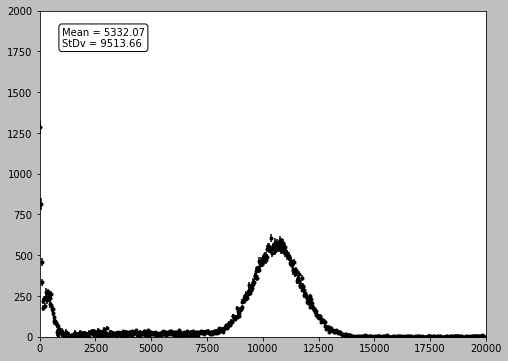

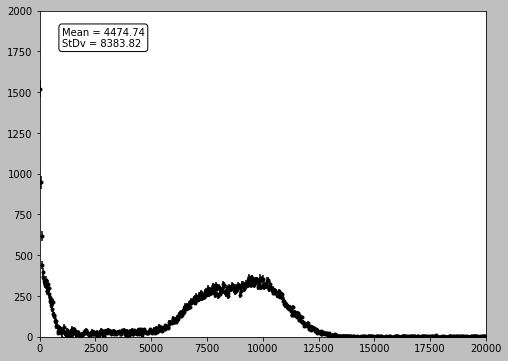

In [32]:
dataloader = DLPerkeo(dir_to_files)
dataloader.fill(test)

meas = dataloader.ret_meas()
corr_class = CorrPerkeo(meas, mode=1)
corr_class.set_all_corr(bactive=False)
corr_class.corrections["Drift"] = False
corr_class.corr(bstore=True, bwrite=False)

for ind, hist in corr_class.histograms:
    for det in range(len(hist)):
        hist[det].plot_hist([0., 20e3, 0., 2e3])

## DetSum for each detector separately WITH corrections

/home/max/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


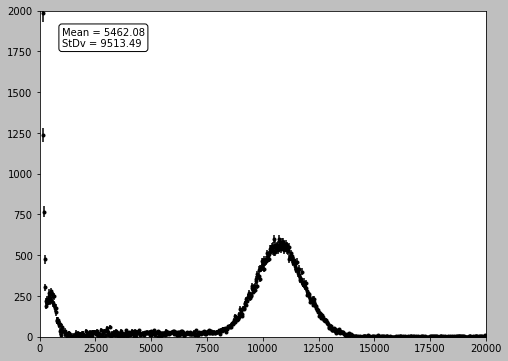

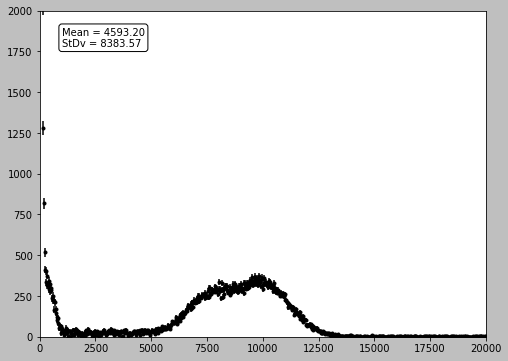

In [33]:
dataloader = DLPerkeo(dir_to_files)
dataloader.fill(test)

meas = dataloader.ret_meas()
corr_class = CorrPerkeo(meas, mode=1)
corr_class.set_all_corr(bactive=True)
corr_class.corrections["Drift"] = False
corr_class.corr(bstore=True, bwrite=False)

for ind, hist in corr_class.histograms:
    for det in range(len(hist)):
        hist[det].plot_hist([0., 20e3, 0., 2e3])

Tried:

Different background files
With/Without correction
Present in raw data
    Artifact of scan position? (oben rechts?)




